<a href="https://colab.research.google.com/github/ejrtks1020/Deep_learning_library/blob/main/_11_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자연어 처리(Natural Language Processing, NLP)

- 한국어, 영어 등 우리가 평소에 쓰는 언어

- 사람의 말을 컴퓨터가 이해하도록 수행하는 과정

## 신경망에서의 단어 처리 (단어 임베딩, Word Embedding)
- 단어를 있는 그대로 처리하지 않고 고정 길이의 벡터로 표현 (원-핫 인코딩)

- 단어 하나에 인덱스 정수를 할당하는 Bag of Words 방법

- 예시)  
  "you", "are", "not", "a", "smart", "student"

  - "you"     : 0
  - "are"     : 1
  - "not"     : 2
  - "a"       : 3
  - "smart"   : 4
  - "student" : 5

        "You are a smart student."  
    ---> [1, 1, 0, 1, 1, 1]

  <br>
  
  <img src="https://miro.medium.com/max/1348/1*YEJf9BQQh0ma1ECs6x_7yQ.png" width="600">

  <sub>출처: https://medium.com/@athif.shaffy/one-hot-encoding-of-text-b69124bef0a7</sub>

## 신경망에서의 단어처리 구조

<img src="https://miro.medium.com/max/1000/1*1O5gLhOg25HviI8bwZxV4g.png" width="600">

<sub>출처: https://mc.ai/deep-nlp-word-vectors-with-word2vec/</sub>

## CBOW (Continuous Bag of Words) Embedding
- 복수 단어 문맥(multi-word context)에 대한 문제  
  즉, 여러개의 단어를 나열한 뒤 이와 관련된 단어를 추정하는 문제

- 예를 들어,  
      Betty bought a bit of better butter.

  위 예시에서 (Betty, a bit, butter)라는 문맥이 주어지면 bought를 예측하는 구조

  <br>

  <img src="https://miro.medium.com/max/604/1*DfuBd49nCtT99h328iXL2Q.png" width="300">

  <sub>출처: https://medium.com/@srishtee.kriti/mathematics-behind-continuous-bag-of-words-cbow-model-1e54cc2ecd88</sub>

## Skip-Gram Embedding
- CBOW 방식과 반대

- 특정한 단어로부터 문맥이 될 수 있는 단어를 예측

- 보통 입력 단어 주변의  $k$ 개 단어를 문맥으로 보고 예측 모형을 만드는데 이  $k$ 값을 window size 라고 한다.

- 예시) window size = 2 라면,  
      Betty -> bought, butter  
      bought -> butter, Betty  
      a -> bit, of  

  <br>

  <img src="https://www.researchgate.net/publication/322905432/figure/fig1/AS:614314310373461@1523475353979/The-architecture-of-Skip-gram-model-20.png" width="300">

  <sub>출처: https://www.researchgate.net/figure/The-architecture-of-Skip-gram-model-20_fig1_322905432</sub>

## Word2Vec
- CBOW, Skip_Gram 방식의 단어 임베딩을 구현.  
  구글의 Mikolov 개발

- subsampling, negative sampling 등의 기법 추가하여 학습 속도 향상

  <img src="https://mbenhaddou.com/wp-content/uploads/2019/12/img_4.png">

  <sub>출처: http://mbenhaddou.com/2019/12/14/word2vec-concepts-from-scratch/</sub>

  <br>

  <img src="https://miro.medium.com/max/2456/1*gcC7b_v7OKWutYN1NAHyMQ.png" width="600">

  <sub>출처: https://towardsdatascience.com/word-embeddings-for-nlp-5b72991e01d4</sub>

## Word2Vec 예제

- 출처: https://datascienceschool.net/view-notebook/6927b0906f884a67b0da9310d3a581ee/

In [ ]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()]

In [ ]:
sentences[0]

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.']

In [ ]:
from gensim.models.word2vec import Word2Vec

In [ ]:
model = Word2Vec(sentences)

In [ ]:
model.init_sims(replace =True)

In [ ]:
model.wv.similarity('fruit', 'apple')

0.8987092

In [ ]:
model.wv.similarity('he', 'she')

0.85762364

In [ ]:
model.wv.similarity('fruit', 'he')

0.10370286

In [ ]:
model.wv.most_similar('computer')

[('non', 0.8161743879318237),
 ('generated', 0.8156142234802246),
 ('sub', 0.8153823614120483),
 ('fledged', 0.7712332010269165),
 ('laden', 0.7696442604064941),
 ('ups', 0.7597616910934448),
 ('plots', 0.7596057653427124),
 ('culture', 0.7568903565406799),
 ('extravaganza', 0.7538684606552124),
 ('fashioned', 0.7365776300430298)]

In [ ]:
model.wv.most_similar(positive=['ship', 'sky'], negative = 'sea', topn = 1)

[('car', 0.5168180465698242)]

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)


In [ ]:
review_vocab = model.wv.vocab
review_similarity = model[review_vocab]
review_similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 0.0273839 , -0.00278723, -0.1242075 , ..., -0.01459092,
        -0.13879609, -0.00566529],
       [-0.0335053 , -0.0975535 , -0.03534881, ...,  0.1225501 ,
         0.06997209, -0.05851094],
       [-0.04012587, -0.06287859,  0.02143304, ...,  0.09701311,
        -0.07512429,  0.04531602],
       ...,
       [-0.00021997, -0.100276  ,  0.03993728, ...,  0.19882424,
         0.03111319,  0.07541023],
       [-0.00243444, -0.1046368 , -0.04686897, ...,  0.21384679,
         0.00342001, -0.00978587],
       [-0.08883671, -0.127789  , -0.00224845, ...,  0.18997273,
         0.02389369, -0.01794205]], dtype=float32)

In [ ]:
import pandas as pd
similarity = tsne.fit_transform(review_similarity)
review_df = pd.DataFrame(similarity, index = review_vocab, columns = ['x', 'y'])
review_1000 = review_df[0:1000]

(-66.41075115203857, 75.68916683197021, -64.16480007171631, 55.2015775680542)

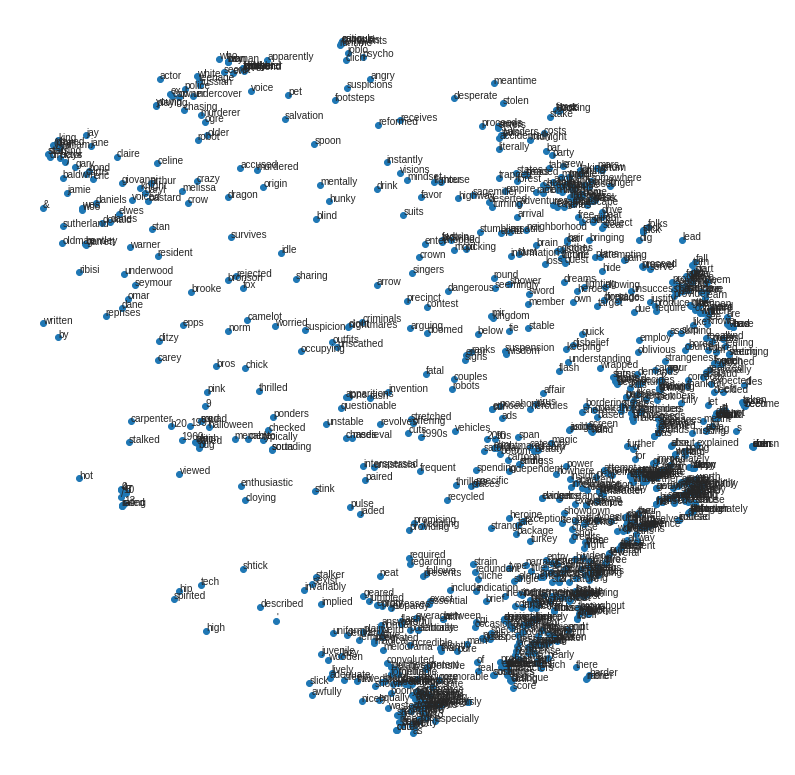

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

fig = plt.figure(figsize = (14, 14))
ax = fig.add_subplot(1 ,1, 1)
ax.scatter(review_1000['x'], review_1000['y'])
for word, pos in review_1000.iterrows():
  ax.annotate(word, pos)
ax.axis('off')

### 네이버 영화 감상 코퍼스를 사용한 한국어 단어 임베딩
- 한국어 임베딩은 "konlpy" 필요

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-white')
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = 'NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fontpath, size = 9)
plt.rc('font', family = 'NanumBraunGothic')
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
!wget = nc http://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

--2021-09-16 15:31:34--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-09-16 15:31:34--  http://nc/
Resolving nc (nc)... failed: No address associated with hostname.
wget: unable to resolve host address ‘nc’
URL transformed to HTTPS due to an HSTS policy
--2021-09-16 15:31:34--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt.1’

ratings_train.txt.1 100%[===================>]  13.95M  --.-KB/s    in 0.1s    

2021-09-16 15:31:34 (143 MB/s) - ‘ratings_train.txt.1’ saved [14628807/14628807]

FINISHED --2021-09-16 15:31:34--
Total wall clock time: 0.3s
Downloaded: 1 files,

In [ ]:
import codecs

def read_data(filename):
  with codecs.open(filename, encoding = 'utf-8', mode = 'r') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]

  return data

train_data = read_data('ratings_train.txt')

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Okt

tagger = Okt()

def tokenize(doc):
  return ['/'.join(t) for t in tagger.pos(doc, norm = True, stem = True)]

train_docs = [row[1] for row in train_data]
train_docs

In [ ]:
sentences = [tokenize(d) for d in train_docs]

In [ ]:
from gensim.models import word2vec

In [ ]:
model = word2vec.Word2Vec(sentences)
model.init_sims(replace = True)

In [ ]:
model.wv.similarity(*tokenize(u'배우 여배우'))

0.7095104

In [ ]:
model.wv.most_similar(tokenize('전투'))

[('자동차/Noun', 0.7856585383415222),
 ('격투/Noun', 0.7742565870285034),
 ('추격/Noun', 0.7672595977783203),
 ('진범/Noun', 0.7506433129310608),
 ('옥상/Noun', 0.7415357232093811),
 ('독백/Noun', 0.7356781959533691),
 ('싸움/Noun', 0.7325723171234131),
 ('민간인/Noun', 0.730826735496521),
 ('건담/Noun', 0.7259114980697632),
 ('씬/Noun', 0.7237730026245117)]

In [ ]:
from konlpy.utils import pprint

pprint(model.wv.most_similar(positive = tokenize('남자 여배우'), negative=tokenize('배우'), topn = 5))

[('여자/Noun', 0.8364808559417725),
 ('할아버지/Noun', 0.7241862416267395),
 ('꼬마/Noun', 0.7154772281646729),
 ('여자애/Noun', 0.6916506290435791),
 ('몸매/Noun', 0.6865686178207397)]


In [ ]:
review_vocab = model.wv.vocab
review_similarity = model[review_vocab]
review_similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-0.03961809, -0.08747943, -0.12391075, ..., -0.07832044,
         0.06673995, -0.0050002 ],
       [ 0.01565972, -0.01429372,  0.10526883, ..., -0.17570752,
        -0.20870125, -0.02287645],
       [ 0.02589389, -0.07829086, -0.01044262, ..., -0.15379429,
        -0.01486793,  0.06965169],
       ...,
       [-0.02357643, -0.1968523 , -0.17394745, ...,  0.07876927,
         0.09608225, -0.10756014],
       [-0.13550536, -0.09167169,  0.02262289, ...,  0.03355018,
        -0.0460348 , -0.24480426],
       [-0.13320988, -0.20413394,  0.11353058, ...,  0.12341534,
        -0.08199553, -0.05891328]], dtype=float32)

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd

tsne = TSNE(n_components = 2)
similarity = tsne.fit_transform(review_similarity)
review_df = pd.DataFrame(similarity, index = review_vocab, columns = ['x', 'y'])
review_1000 = review_df[0:1000]

(-76.67225532531738, 72.65889625549316, -73.85557250976562, 78.05047302246093)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48729 missing from current font.
  font.set_text

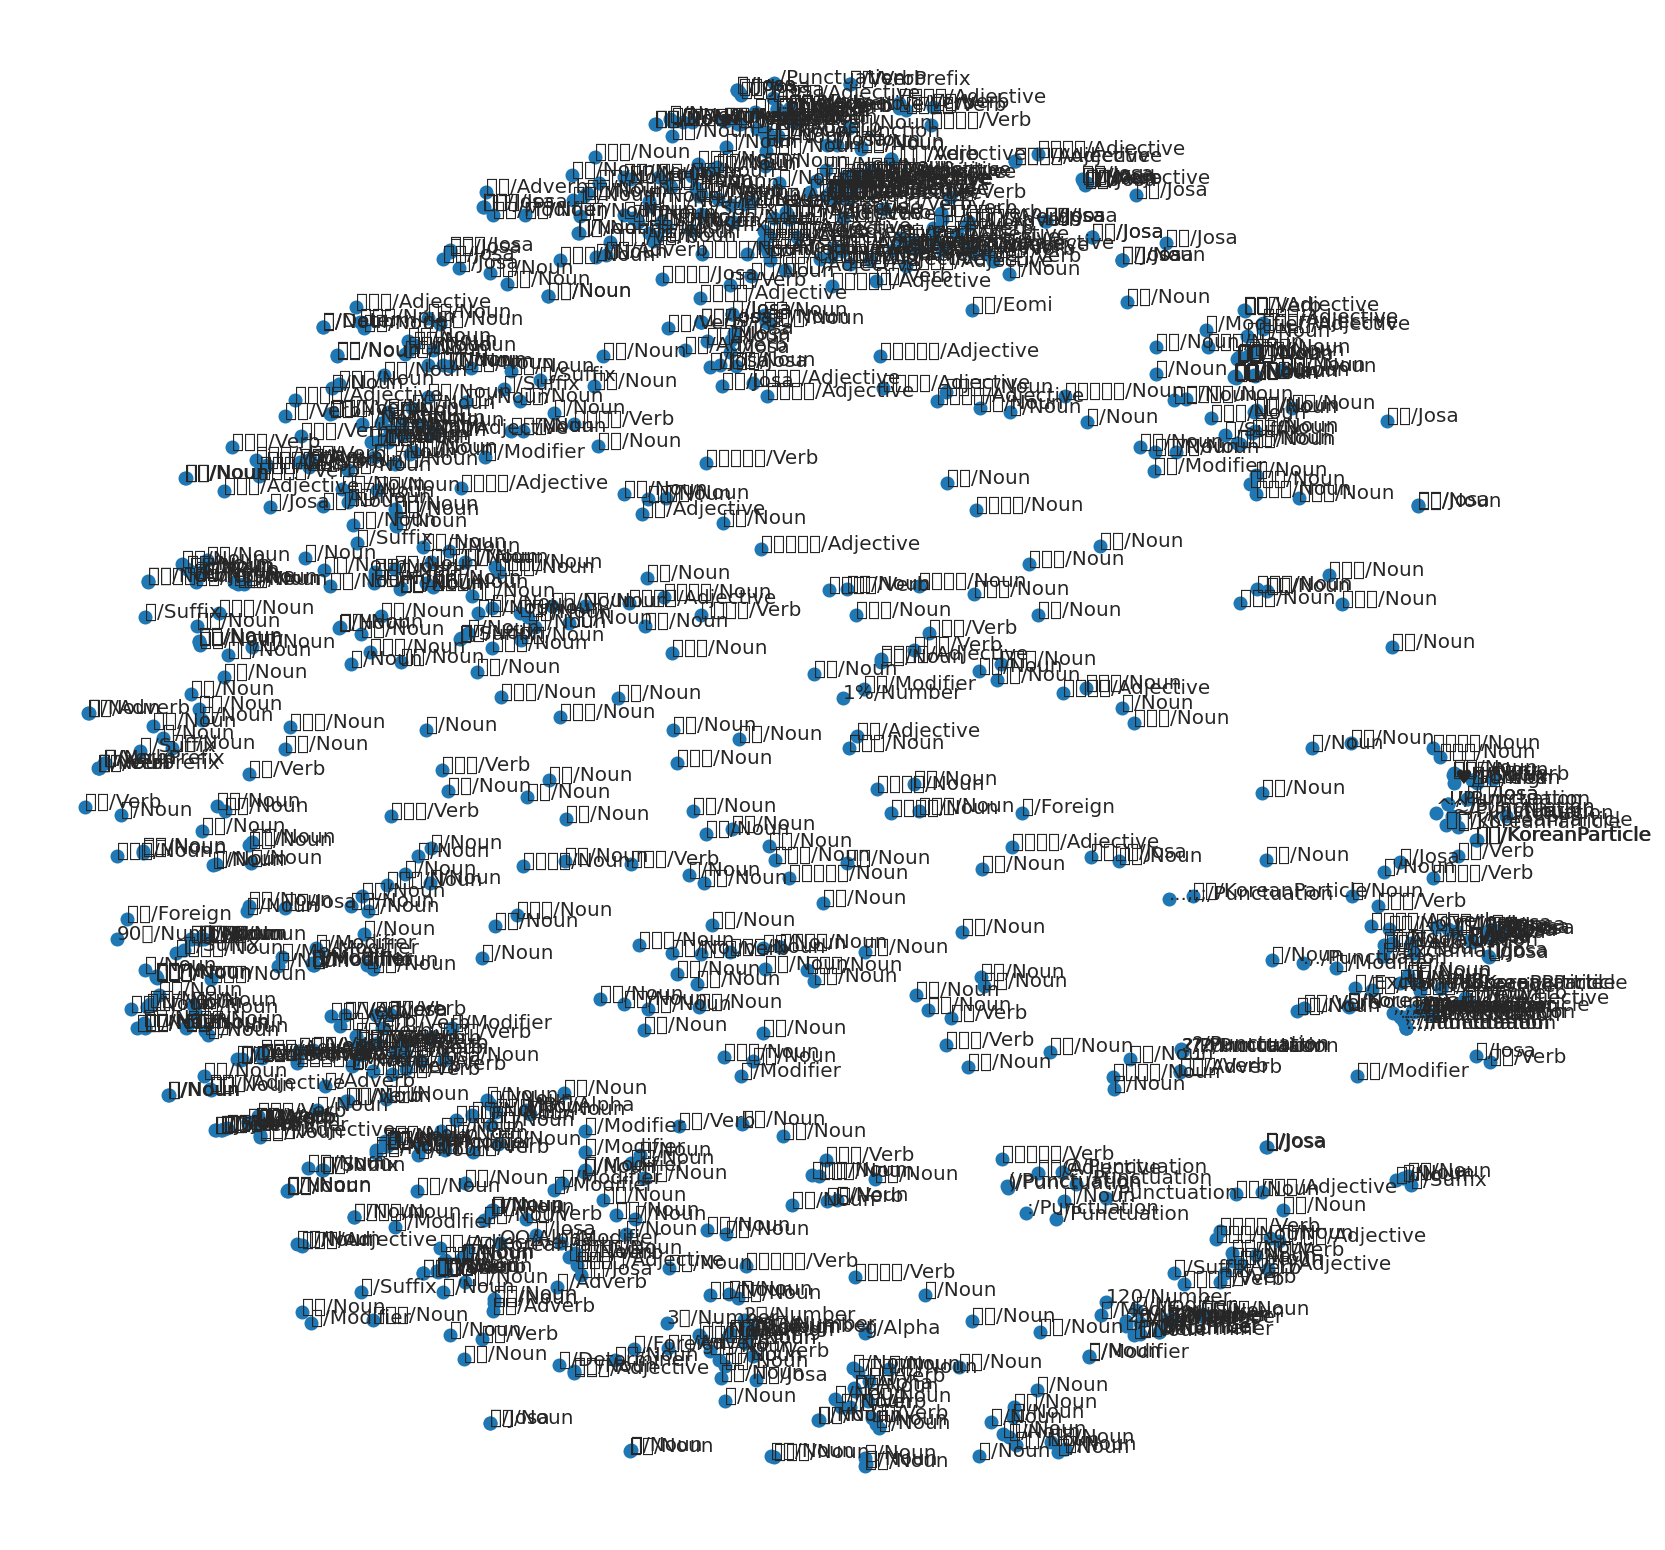

In [ ]:
fig = plt.figure(figsize = (14, 14))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(review_1000['x'] , review_1000['y'])
for word, pos in review_1000.iterrows():
  ax.annotate(word, pos)
ax.axis('off')

# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터** 

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 단방향 구조

  - 이전 스텝의 출력의 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - 현재 상태가 이전 상태에 종속

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시각을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN

- one to many
  - Image Captioning 

  - 이미지에 대한 설명 생성

- many to one
  - Sentiment Classification

  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many
  - Machine Translation

  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)




## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

- $h$는 '상태'를 기억

- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## BPTT(BackPropagation Through Time)

- 시간 방향으로 펼친 신경망의 오차역전파

- 시계열 데이터의 시간 크기가 커지면 역전파 시 불안정해짐

- 기울기 소실 문제 발생

  <img src="https://iamtrask.github.io/img/backprop_through_time.gif" width="700">

  <sub>출처: https://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/</sub>

## Truncated BPTT

- 큰 시계열 데이터를 다룰 때 사용하는 오차역전파법

- 신경망을 **적당한 길이로 끊는다.**
  - <u>역전파에 연결만! 순전파의 연결은 끊어지지 않는다.</u>

- 학습 시, 입력이 **순서대로 연결**되어 입력해야 함

  <img src="https://r2rt.com/static/images/RNN_true_truncated_backprop.png">

  <sub>출처: https://r2rt.com/styles-of-truncated-backpropagation.html</sub>


## RNN 구현

- 형상 주의!

## $\qquad \ h_{t-1} W_h \ + \ x_t W_x = h_t$

- $h_{t-1}$ : $N \times H$

- $W_{h}$ : $H \times H$

- $x_{t}$ : $N \times D$

- $W_{x}$ : $D \times H$

- $h_t$ : $N \times H$

- $D$ : 입력 벡터의 차원 수

- $H$ : 은닉 상태 벡터의 차원 수


## Time RNN Layer
- RNN 계층의 은닉상태 $h$를 가지고 있음
 

# LSTM (Long Shot-Term Memory)

- RNN은 장기 기억을 제대로 처리 못함

- RNN은 기울기 소실 또는 기울기 폭발을 발생

- 위를 해결하기 위해 LSTM 방법 등장

  <img src="https://www.researchgate.net/publication/324600237/figure/fig3/AS:616974623178753@1524109621725/Long-Short-term-Memory-Neural-Network.png" width="600">

<sub>출처: https://www.researchgate.net/figure/Long-Short-term-Memory-Neural-Network_fig3_324600237</sub>

### $\qquad f = \sigma (x_t W^{(f)}_x + h_{t-1} W^{(f)}_h + b^{(f)} \\ 
\qquad g = tanh(x_t W^{(g)}_x + h_{t-1} W^{(g)}_h + b^{(g)}) \\
\qquad i = \sigma(x_t W^{(i)}_x + h_{t-1} W^{(i)}_h + b^{(i)}) \\
\qquad o = tanh(x_t W^{(o)}_x + h_{t-1} W^{(o)}_h + b^{(o)})$


### $\qquad c_t = f \odot c_{t-1} + g \odot i \\
\qquad h_t = o \odot tanh(c_t)
$


## forget gate (망각 게이트)
- 불필요한 정보를 잊는 게이트

-  $h_{t−1}$ 과 $x_t$ 를 받아 시그모이드를 취해준 값이 forget gate의 출력값

- 시그모이드 함수를 통과하기 때문에 그 값이 0이라면 이전 상태의 정보는 잊고, 1이라면 이전 상태의 정보를 온전히 기억

  <img src="https://image.slidesharecdn.com/dlsl2017d2l2recurrentneuralnetworksi-170125171004/95/recurrent-neural-networks-i-d2l2-deep-learning-for-speech-and-language-upc-2017-25-638.jpg?cb=1485365064" width="600">

  <sub>출처: https://www.slideshare.net/xavigiro/recurrent-neural-networks-1-d2l2-deep-learning-for-speech-and-language-upc-2017</sub>

## input gate (입력 게이트)
- 현재 정보를 기억하기’ 위한 게이트

- $h_{t−1}$ 과 $x_t$를 받아 $Sigmoid$ -> $tanh$ 를 통과한 다음,  
  Hadamard product 연산을 한 값을 출력
  
  <br>

  <img src="https://image.slidesharecdn.com/dlmmdcud2l08recurrentneuralnetworks-170429103823/95/recurrent-neural-networks-d2l8-insightdcu-machine-learning-workshop-2017-28-638.jpg?cb=1493462658" width="600">

  <sub>출처: https://www.slideshare.net/xavigiro/recurrent-neural-networks-1-d2l2-deep-learning-for-speech-and-language-upc-2017</sub>

## output gate (출력 게이트)

- 은닉 상태 $h_t$의 출력을 담당하는 게이트

- 입력 $x_t$와 이전 상태 $h_{t-1}$로부터 게이트의 열림 상태가 결정됨

  <img src="https://image.slidesharecdn.com/dlcvd2l6recurrentneuralnetworks-160802094750/95/deep-learning-for-computer-vision-recurrent-neural-networks-upc-2016-30-638.jpg?cb=1470131837" width="600">

<sub>출처: https://www.slideshare.net/xavigiro/deep-learning-for-computer-vision-recurrent-neural-networks-upc-2016</sub>

## LSTM 구현

# GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\ 
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


# (참고) RNN vs LSTM vs GRU

<img src="https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_1849/http://dprogrammer.org/wp-content/uploads/2019/04/RNN-vs-LSTM-vs-GRU.png">

<sub>출처: http://dprogrammer.org/rnn-lstm-gru</sub>